In [3]:
%config Completer.use_jedi = False

In [2]:
#약봉투 이미지 크롤링
from requests import request
from requests.exceptions import HTTPError
from time import sleep

def download(url, params={}, method='GET', retires=3):
    resp = None
    try:
        resp = request(method, url, params=params if method=='GET' else {}, data=params if method=='POST' else {}, headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'})
        resp.raise_for_status()
        #아니면,
        #if resp.status_code != 200:
    except HTTPError as e:
        if 500 <= e.response.status_code:
            if retries > 0:
                sleep(3)
                resp = download(url, params=params, method=method, retries=retires-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Response', e.response.headers)

    return resp

In [ ]:
http://www.yuhanmedical.co.kr/shop/list.php
    ?ca_id=5010
    &sort=
    &sortodr=
    &page=1

In [8]:
from bs4 import BeautifulSoup

url = 'http://www.yuhanmedical.co.kr/shop/list.php?ca_id=5010'
resp = download(url)
dom = BeautifulSoup(resp.text, 'lxml')

In [9]:
dom.body

# 한 번에 주석 처리: Ctrl + /

# <div class="sct_img">
# <a href="http://www.yuhanmedical.co.kr/shop/item.php?it_id=1519620073">
# <img alt="팜2000용-기성(무상호),1천매" height="170" src="http://www.yuhanmedical.co.kr/data/item/1519620073/thumb-7KCE7IKw7Yyc2000_220x170.jpg" width="220"/>
# </a>
# <div class="sct_btn list-10-btn">
# <button class="btn_cart sct_cart" data-it_id="1519620073" type="button"><i aria-hidden="true" class="fa fa-shopping-cart"></i> 장바구니</button>
# </div>
# <div class="cart-layer"></div>
# </div>
# <div class="sct_ct_wrap">
# <div class="sct_txt"><a href="http://www.yuhanmedical.co.kr/shop/item.php?it_id=1519620073">
# 팜2000용-기성(무상호),1천매
# </a></div>

<body>
<!DOCTYPE html>

<meta content="txt/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width" name="viewport"/>
<meta content="9824eabc29b9004e3142fcfc5e6a73558c3d13d9" name="naver-site-verification"/>
<meta content="전자동가루약포장기,자동약포장기,약포장기,투약병,종이봉투,분포지,프린트리본,정제분쇄기,비닐봉투,지퍼봉투,전산봉투,연고곽" name="description"/>
<!-- CSS -->
<link href="/css/owl.carousel.min.css" rel="stylesheet" type="text/css"/>
<link href="/css/animate.min.css" rel="stylesheet" type="text/css"/>
<link href="/css/style.css" rel="stylesheet" type="text/css"/>
<!-- SCRIPT -->
<script language="javascript" src="/js/owl.carousel.min.js" type="text/javascript"></script>
<script language="javascript" src="/js/jquery-ui.cst.js" type="text/javascript"></script>
<script type="text/javascript">
$(document).ready(function() {
     $(".owl-carousel").owlCarousel({
         navigation : true, // Show next and prev buttons
         slideSpeed :

In [10]:
resp.headers

{'Date': 'Thu, 09 Nov 2023 06:53:25 GMT', 'Server': 'Apache', 'X-Powered-By': 'PHP/5.6.40', 'P3P': 'CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"', 'Expires': '0', 'Cache-Control': 'pre-check=0, post-check=0, max-age=0', 'Pragma': 'no-cache', 'Set-Cookie': 'PHPSESSID=f1n59lbptvrltaqfi3oldaad21; path=/, 2a0d2363701f23f8a75028924a3af643=MTYzLjE1Mi4zLjE2Mg%3D%3D; expires=Fri, 10-Nov-2023 06:53:25 GMT; Max-Age=86400; path=/', 'Last-Modified': 'Thu, 09 Nov 2023 06:53:25 GMT', 'Connection': 'close', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html; charset=utf-8'}

In [25]:
dom.body.select('img')

[<img alt="" src="/images/logo_top.png"/>,
 <img alt="" src="/images/banner_01.png"/>,
 <img alt="" src="/images/banner_02.png"/>,
 <img alt="팜2000용-기성(무상호),1천매" height="170" src="http://www.yuhanmedical.co.kr/data/item/1519620073/thumb-7KCE7IKw7Yyc2000_220x170.jpg" width="220"/>,
 <img alt="페이스북에 공유" src="http://www.yuhanmedical.co.kr/theme/basic/skin/shop/basic/img/facebook.png"/>,
 <img alt="트위터에 공유" src="http://www.yuhanmedical.co.kr/theme/basic/skin/shop/basic/img/twitter.png"/>,
 <img alt="구글플러스에 공유" src="http://www.yuhanmedical.co.kr/theme/basic/skin/shop/basic/img/gplus.png"/>,
 <img alt="메디다스용-기성(무상호),1천매" height="170" src="http://www.yuhanmedical.co.kr/data/item/1519619879/thumb-7KCE7IKw66mU65SU64uk7Iqk_220x170.jpg" width="220"/>,
 <img alt="페이스북에 공유" src="http://www.yuhanmedical.co.kr/theme/basic/skin/shop/basic/img/facebook.png"/>,
 <img alt="트위터에 공유" src="http://www.yuhanmedical.co.kr/theme/basic/skin/shop/basic/img/twitter.png"/>,
 <img alt="구글플러스에 공유" src="http://www.yuh

In [3]:
pip install pillow


  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/32/e4/978865107d097dd9cb650331676d8dc29ed9fcd0aaab46486e9d6e5123f0/Pillow-10.1.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 435.7 kB/s eta 0:00:06
    --------------------------------------- 0.1/2.6 MB 544.7 kB/s eta 0:00:05
   ---- ----------------------------------- 0.3/2.6 MB 2.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.6/2.6 MB 3.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 4.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.6 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.9/2.6 MB 5.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


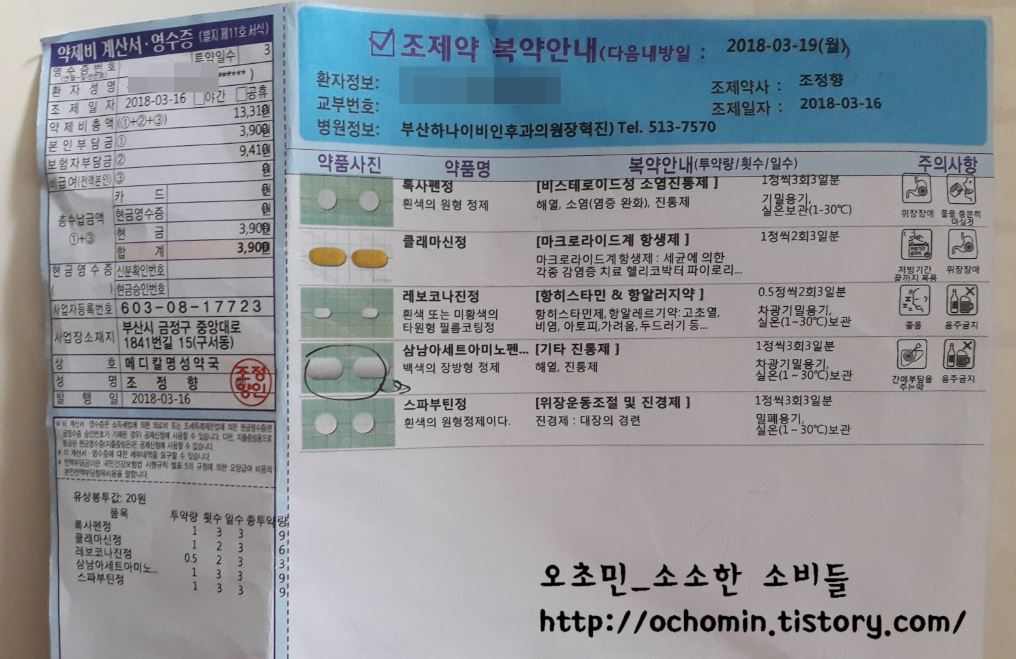

In [67]:
from PIL import Image
from PIL import ImageDraw

img1 = Image.open('med/med5.jpg')
img1

In [5]:
pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=7d188f7bf902135d9fd5de10e16d55c7c0bcfb5e515ddee37ae8632a4d213240
  Stored in directory: c:\users\glori\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.21.2 from https://files.pythonhosted.org/packages/32/95/908d0caa051beae4f7c77652dbbeb781e7b717f3040c5c5fcaed4d3ed08f/numpy-1.26.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 808.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.1 MB 6.3 MB/s eta 0:00:06
    --------------------------------------- 0.6/38.1 MB 7.6 MB/s eta 0:00:05
    ----------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install opencv-contrib-python

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/81/3c/bbb3ceee9fbefc505f98c24dafda68c7b3c4f83b6951c0712b4623fe4cce/opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB 653.6 kB/s eta 0:01:09
   ---------------------------------------- 0.3/44.8 MB 2.9 MB/s eta 0:00:16
    --------------------------------------- 0.8/44.8 MB 5.2 MB/s eta 0:00:09
   - -------------------------------------- 1.3/44.8 MB 6.4 MB/s eta 0:00:07
   - -------------------------------------- 1.9/44.8 MB 7.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/44.8 MB 8.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.8/44.8 MB 7.8 MB/s eta 0:00:06
   -- ------------------------------------- 3.3/44.8 MB 8.3 MB/s eta 0:00:05
   --


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d9/82/59970be41cc28cd7b7ae3ddc1d6b3891715af669ea0a0d2c244e126d3bb6/matplotlib-3.8.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/0d/0e/b23a19158c918cad2da281350eee227d16abe2655cf85f1adb357a7bb3ff/fonttools-4.44.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/156.8 kB ? eta -:

In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/f4/ce/be0b376ba6069f3f8ba240aa532a374733447453c93582d4c474effdde21/scipy-1.11.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 165.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 292.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/43.7 MB 4.6 MB/s eta 0:00:10
   ---------------------------------------- 0.5/43.7 MB 5.8 MB/s eta 0:00:08
    --------------------------------------- 0.8/43.7 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.2/43.7 MB 7.4 MB/s eta 0:00:06
   - ---------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [68]:
path = f'med/med5.jpg'
image = cv2.imread(path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(rgb_image, lang='kor+eng')
print(text)

현영 수 Suenos
Hastie |
603-08- aur

tai 길 isl

ee     owes              복약안내(투약량/횟수/일수)            ;
dad * 00 원형 정제     해열. 소염(염증 완화) 진통제       AEE

클래마신정

레보코나진정

흰색 또는 미황색의
타원형 필름코팅정

백색의 장방형 정제

스파부틴정
DS fe

삼남아세트아미노펜…… [기타 진통제 ]

00 에레 테이
[마크로라이드계 항생제 ]            정씩2희3일분                  [이
deteeae 엘리코바티피이로리-
[항히스타민 & 항알러지약 ]        .0.5정씩2회3일분

Beis 항얄레르기약 고조일.    광기밀
비염, 아토피.가려움,두드러:                 ci       pa

를       Hee
[위장운동조절 및 진경제 ] = aNeae
aba                 HPboee

오초민_소소한 ABE
http://ochomin,tistory.com/



In [43]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

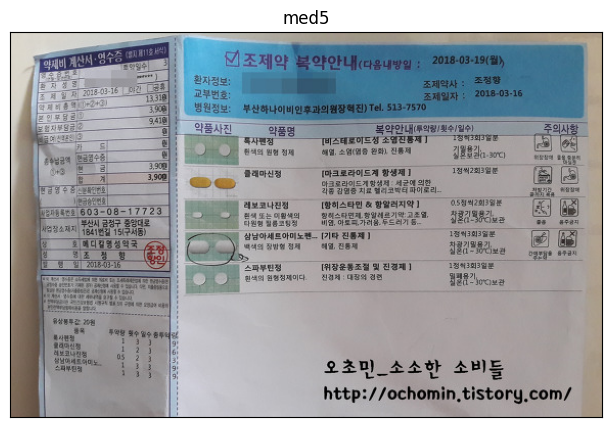

In [44]:
#url = 'https://regist.pharmplus.biz/images/samples/goods_06.png'
#url = 'http://www.pharm21.com/news/photo/201306/78508_67999_5325.jpg'
url = 'https://t1.daumcdn.net/cfile/tistory/99BC393A5AABD8BA0A'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)

plt_imshow("med5", org_image)

In [35]:
import cv2
import imutils
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

# Function for extracting bold text from an image
def extract_bold_text(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    text = pytesseract.image_to_string(Image.fromarray(thresholded))
    return text

# Modified make_scan_image function
def make_scan_image(image, width, ksize=(5, 5), min_threshold=75, max_threshold=200, output_path="transformed_image.jpg"):
    org_image = image.copy()
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    findCnt = None

    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        if len(approx) == 4:
            findCnt = approx.astype(np.float32)  # Convert to float32
            break

    if findCnt is None:
        raise Exception(("Could not find outline."))

    output = image.copy()
    cv2.drawContours(output, [findCnt.astype(int)], -1, (0, 255, 0), 2)  # Convert findCnt to int

##    image_list_title.append("Outline")
##    image_list.append(output)

    transform_image = cv2.warpPerspective(org_image, cv2.getPerspectiveTransform(findCnt.reshape(4, 2) * ratio, findCnt.reshape(4, 2)), (org_image.shape[1], org_image.shape[0]))

    # Save the transformed image
    cv2.imwrite(output_path, transform_image)

    # Extract bold text from the transformed image
    extracted_text = extract_bold_text(transform_image)
    print("Extracted Text:")
    print(extracted_text)

    return transform_image

In [36]:
receipt_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100, output_path="transformed_image.jpg")

Extracted Text:



In [51]:
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
    image_list_title = []
    image_list = []
 
    org_image = image.copy()
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])
 
    # 이미지를 grayscale로 변환하고 blur를 적용
    # 모서리를 찾기위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]
 
    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
    findCnt = None
 
    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
        # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
        if len(approx) == 4:
            findCnt = approx
            break
 
    # 만약 추출한 윤곽이 없을 경우 오류
    if findCnt is None:
        raise Exception(("Could not find outline."))
 
    output = image.copy()
    cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)
  
    image_list_title.append("Outline")
    image_list.append(output)
 
    # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
    transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)
 
    plt_imshow(image_list_title, image_list)
    plt_imshow("Transform", transform_image)
 
    return transform_image

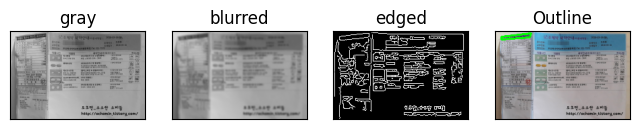

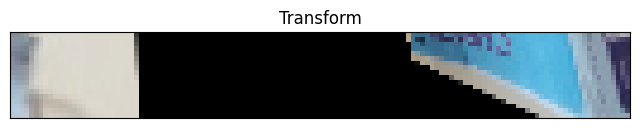

In [52]:
receipt_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

In [48]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

options = "--psm 4"
text = pytesseract.image_to_string(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB), config=options, lang='kor')
 
# OCR결과 출력
print("[INFO] OCR결과:")
print("==================")
print(text)
print("\n")

[INFO] OCR결과:
약풀사진 약       약안내
를 에     그 디오

| 태으태깨                                 20860

제 황성제]
00000
외피 09000

모란
13994500-14

00100000
보태 99400

청2100

오초민_소소한 소비들
『라더//0다01710.756006.00107/





In [ ]:
text 매칭, 이미지 매칭 - 찾아보기

In [1]:
!pip install easyocr

ERROR: Cannot install easyocr==1.0, easyocr==1.1, easyocr==1.1.1, easyocr==1.1.10, easyocr==1.1.2, easyocr==1.1.3, easyocr==1.1.4, easyocr==1.1.5, easyocr==1.1.6, easyocr==1.1.7, easyocr==1.1.8, easyocr==1.1.9, easyocr==1.2, easyocr==1.2.1, easyocr==1.2.2, easyocr==1.2.3, easyocr==1.2.4, easyocr==1.2.5, easyocr==1.2.5.1, easyocr==1.3, easyocr==1.3.0.1, easyocr==1.3.1, easyocr==1.3.2, easyocr==1.4, easyocr==1.4.1, easyocr==1.4.2, easyocr==1.5.0, easyocr==1.6.0, easyocr==1.6.1, easyocr==1.6.2, easyocr==1.7.0 and easyocr==1.7.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of easyocr to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/f7/72/403670eff77ee3818858cce05e8f7cbbbe81619fff4ab6efd11533c9a03f/easyocr-1.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB 640.0 kB/s eta 0:00:05
     ---- ----------------------------------- 0.3/2.9 MB 3.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/2.9 MB 6.1 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/2.9 MB 6.7 MB/s eta 0:00:01
     ----------------------- ---------------- 1.7/2.9 MB 7.6 MB/s eta 0:

In [2]:
import easyocr

reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext('med/med5.jpg')

print(result)

ModuleNotFoundError: No module named 'easyocr'

In [5]:
import pytesseract
import cv2
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
result = open("C:\\Users\\glori\\OneDrive\\바탕 화면\\SW 아카데미 Jupyter Lab\\med\\med5.jpg", "w")
# C:\\scan_image\\output.txt","w")

path_dir = 'C:\\Users\\glori\\OneDrive\\바탕 화면\\SW 아카데미 Jupyter Lab\\med'
# \\scan_image'
file_list = os.listdir(path_dir)

for file_name in file_list :
    if file_name == "med5.jpg":
    # "output.txt":
        continue
    result.write(pytesseract.image_to_string('C:\\Users\\glori\\OneDrive\\바탕 화면\\SW 아카데미 Jupyter Lab\\med'+file_name,lang='ENG+KOR',config='--psm 4 -c preserve_interword_spaces=1')+'\n) # C:\\scan_image\\
result.close()
print("추출이 완료되었습니다. 확인부탁드립니다.")

# encoding='cp949'

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 54: invalid start byte

In [6]:
pip install pyocr

   ---------------------------------------- 0.0/40.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/40.0 kB ? eta -:--:--
   ---------- ----------------------------- 10.2/40.0 kB ? eta -:--:--
   -------------------- ------------------- 20.5/40.0 kB 320.0 kB/s eta 0:00:01
   ------------------------------ --------- 30.7/40.0 kB 262.6 kB/s eta 0:00:01
   ---------------------------------------- 40.0/40.0 kB 211.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import os
import pyocr
import pyocr.builders
from PIL import Image

In [2]:
# 툴 가져오기
tools = pyocr.get_available_tools()

In [3]:
# 툴이 있는지 확인
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)

In [4]:
# 권장되는 순서대로 툴 반환
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))

Will use tool 'Tesseract (sh)'


In [5]:
# 사용할 수 있는 언어 출력
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))

Available languages: eng, kor, osd


In [6]:
# 한국어 사용
lang = langs[1]
print("Will use lang '%s'" % (lang))

Will use lang 'kor'


In [9]:
txt = tool.image_to_string(
    Image.open('med/med7.jpg'),
    lang='kor',
    builder=pyocr.builders.TextBuilder()
)
print(txt)

영 수 증 번 호 , 2013091001237

환 자 성 명 홍길동
조 제 일 자 2013-04-25

투약 일 수
약제비총 핵
본인부담금 06)
보험자부담금 @)
비급여[존본인 @

과 드
총수납금액 8234
4 현 금
마늘 이

현금영수증, 신분확인번호 |

(소득공제) 현금승인번호

시업자등록번호 200186$2895595
 서울시 영등포구 양평동3가 16번지| |
시아 윈짐@62 0071 1208호

:         12
 바난정       개
1 레보프라이드     12

ㅣ 00:드      1 3
은         13
13

상 호 09
상 대
발 행 일|2013-04-2

2 디야간디공휴
10.310

3.000

(최근내방일 20130472) < 4
\ 올메텍플러스정20/12.500   도그   거
탤 한미아스피린장용정10000

조제약&복약안내.

각종 감염증을 치료

중단마세요.
-설사, 간효소 상승, 발:

있어요.

흰색정제 (실온보관
-항균작용을나티냄으로써세균에의한

-증상 개선시 전문가와상의없이 투약

병.의원 처방조제약국]

환자정보 : 홍길동 (남/만 34세)     조제약사 ;이영희 조제 일 자 : 2013-04-25
발행기관 : 행복한의원  소이                                복용완료일 : 2013-04-27 이내
약국주소 : 서울 영등포                                    희망약
. 올메텍플러스정20/12.500      : (열압강하제) ' 한미아스피린장용정10000      (항혈소판제)
월        ： 주황색 정제 (실온보관)             ㅣ 흰색장용정 (실온보관)
0  0 0 -혈관확장및수분재흡수억제작용으로       ,  -혈소판응집을 억제하여 혈전 생성을
ㅣ 혈압을낮추고 신장을보호           방지함으로써 심혈관계 질환을 예방
뼈 -눔거나않은 자세에서 일어날때 천천히          -아스피린에 과민증 있는 경우    |
하세요.      

-------------------

In [27]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np

In [28]:
image = cv2.imread('med/med7.jpg')
image_gray = cv2.imread('med/med7.jpg', cv2.IMREAD_GRAYSCALE)

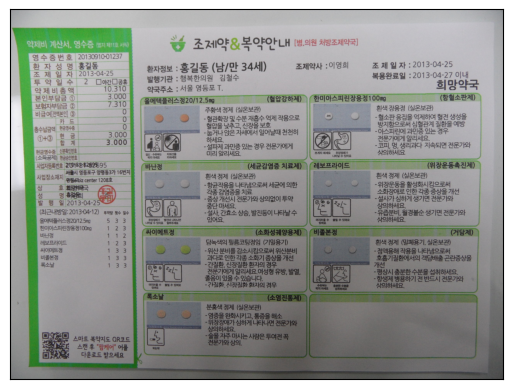

In [29]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

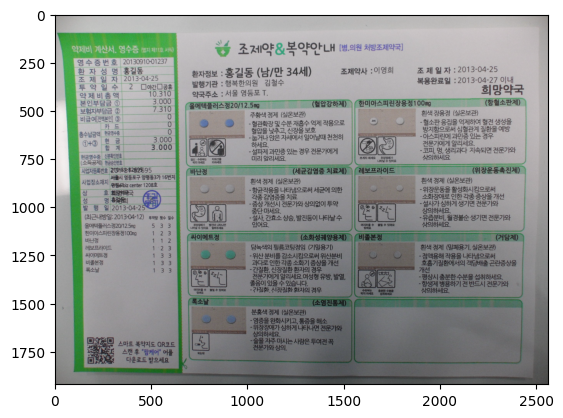

In [30]:
plt.imshow(image)

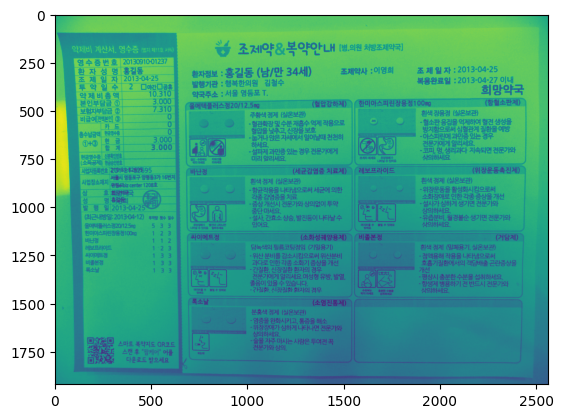

In [31]:
plt.imshow(image_gray)

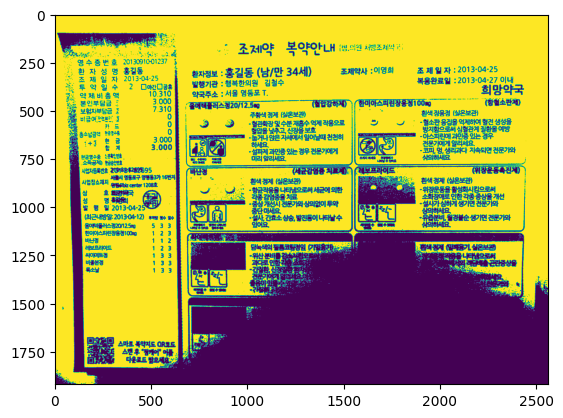

In [32]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)

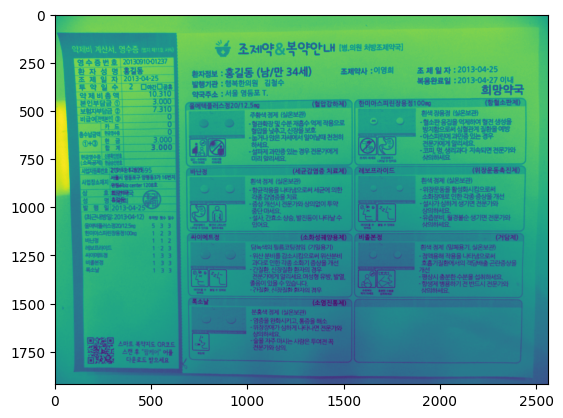

In [33]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blur)

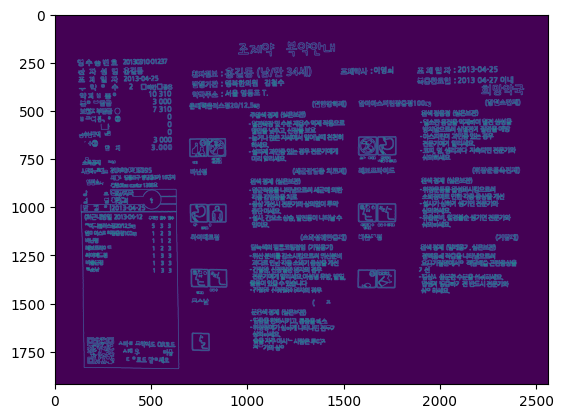

In [34]:
edged = cv2.Canny(blur, 10, 250)
plt.imshow(edged)

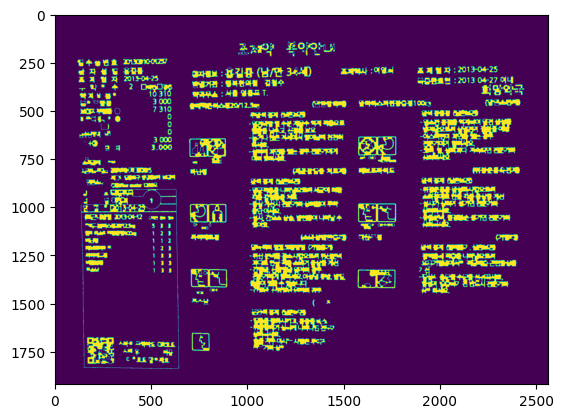

In [35]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [36]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

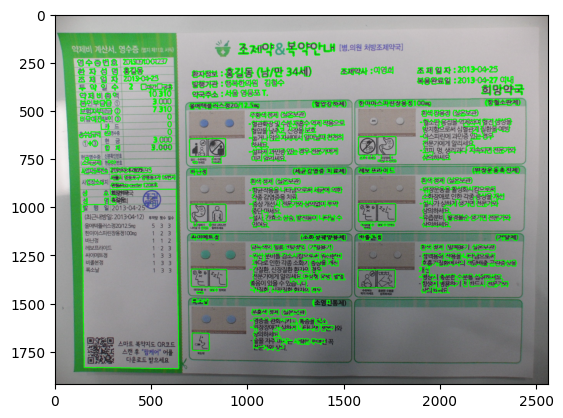

In [37]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(contours_image)

In [38]:
contours_xy = np.array(contours, dtype = object)
contours_xy.shape

(233,)

In [39]:
{len(e) for e in contours}

{4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 92,
 93,
 94,
 95,
 97,
 100,
 101,
 103,
 104,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 125,
 132,
 142,
 145,
 155,
 160,
 165,
 168,
 170,
 172,
 174,
 176,
 178,
 210,
 217,
 222,
 231,
 242,
 265,
 271,
 329,
 334,
 464,
 620,
 639,
 699,
 761,
 865,
 1216}

In [40]:
np.array(contours)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (233,) + inhomogeneous part.

In [41]:
contours

(array([[[1333, 1685]],
 
        [[1333, 1686]],
 
        [[1332, 1687]],
 
        [[1332, 1702]],
 
        [[1331, 1703]],
 
        [[1328, 1703]],
 
        [[1328, 1705]],
 
        [[1329, 1706]],
 
        [[1339, 1706]],
 
        [[1341, 1708]],
 
        [[1341, 1714]],
 
        [[1343, 1714]],
 
        [[1344, 1715]],
 
        [[1344, 1708]],
 
        [[1345, 1707]],
 
        [[1345, 1704]],
 
        [[1346, 1703]],
 
        [[1357, 1703]],
 
        [[1359, 1705]],
 
        [[1359, 1706]],
 
        [[1361, 1708]],
 
        [[1365, 1708]],
 
        [[1366, 1709]],
 
        [[1367, 1708]],
 
        [[1369, 1708]],
 
        [[1370, 1707]],
 
        [[1377, 1707]],
 
        [[1378, 1708]],
 
        [[1378, 1714]],
 
        [[1379, 1715]],
 
        [[1380, 1715]],
 
        [[1381, 1716]],
 
        [[1381, 1714]],
 
        [[1382, 1713]],
 
        [[1382, 1705]],
 
        [[1383, 1704]],
 
        [[1386, 1704]],
 
        [[1387, 1703]],
 
        [[13

In [42]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)

116
2435
143
1840


In [43]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [44]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('med/med7_trim.jpg', img_trim)
org_image = cv2.imread('med/med7_trim.jpg')

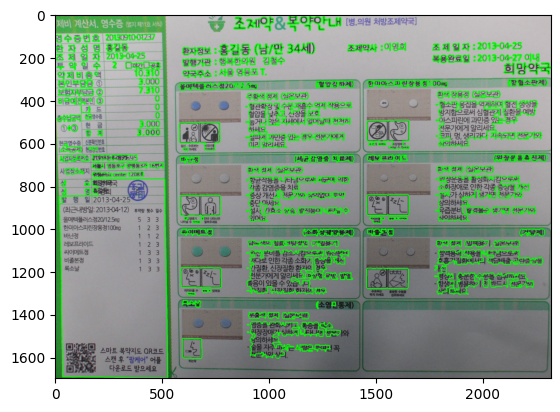

In [45]:
plt.imshow(org_image)

In [46]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

options = "--psm 4"
text = pytesseract.image_to_string('med/med7_trim.jpg', config=options, lang='kor')
print(text)

> 조제약&,옥약안내

/만 34세)  조제약사 :이염의 조제일자 ;201304-25
97: 뜨게                     80080 2013 아22 이내

행 일 2013-04-25

(최근내방일:20131(04-12) 투믹랑 횟수 일수
올메택플러스정20/12.50               533
한미아스피린장용정10000    123
바난정               개 우구 오경
레보프라이드           2

싸이메트정                                  120
비졸본정

:         삐 ㅅㅁ |트 복약지도 야보드
:    스캔 후 “팡케어" 어플
다운로드 받으세요



In [47]:
import re
pattern = r'.*정+.*|레보프라이드+.*'
re.findall(pattern, text)

['올메택플러스정20/12.50               533',
 '한미아스피린장용정10000    123',
 '바난정               개 우구 오경',
 '레보프라이드           2',
 '싸이메트정                                  120',
 '비졸본정']

-------

In [1]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('med/med1.jpg')
image_gray = cv2.imread('med/med1.jpg', cv2.IMREAD_GRAYSCALE)

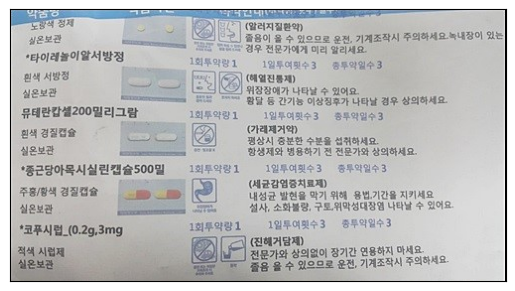

In [3]:
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

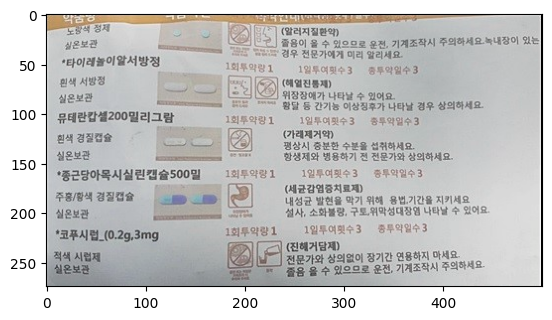

In [4]:
plt.imshow(image)

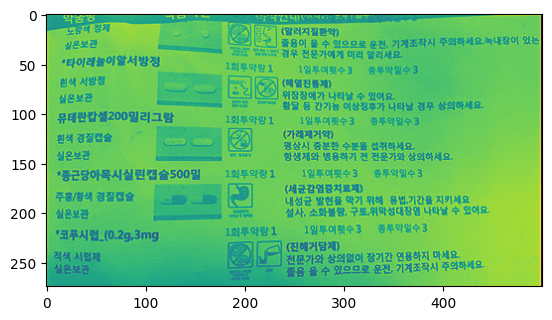

In [5]:
plt.imshow(image_gray)

In [6]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [7]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

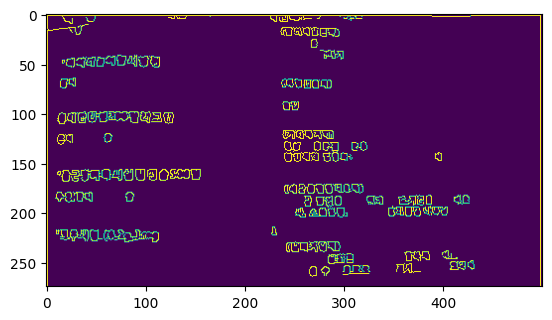

In [8]:
edged = cv2.Canny(blur, 10, 250)
plt.imshow(edged)

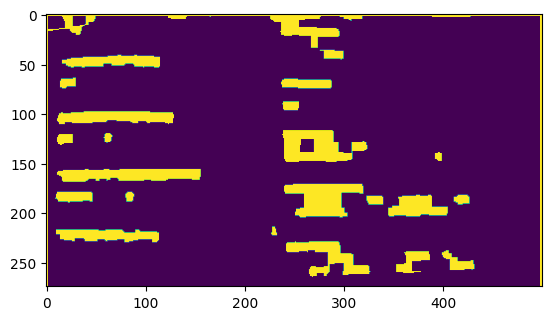

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [10]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

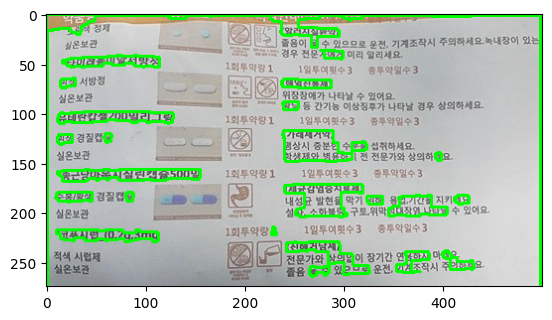

In [11]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 2)
plt.imshow(contours_image)

In [12]:
contours_xy = np.array(contours, dtype = object)
contours_xy.shape

(23,)

In [13]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)

0
499
0
273


In [14]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [15]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('med/med1_trim.jpg', img_trim)
org_image = cv2.imread('med/med1_trim.jpg')

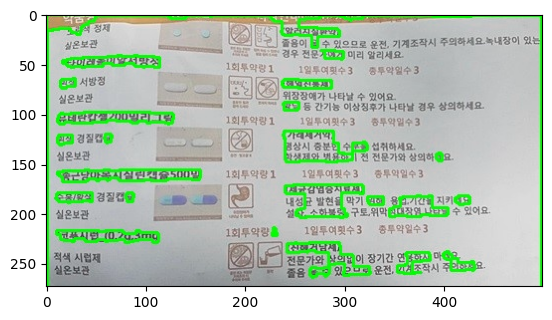

In [16]:
plt.imshow(org_image)

In [24]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

options = "--psm 4"
text = pytesseract.image_to_string('med/med1_trim.jpg', config=options, lang='kor')
print(text)

으므로 운전. 기계조작시 주의하세요 녹내장이 있더
미리 알리세요.
199 1950 태이
오쓰

장예가 나타날 수 있어요.
1 간기능이상징후가 나타날 경우 상의하세요.

그희투와랑1 | 1윌두이윗수3: 증투약일수3

0 -- 이터 시이어

그회투왁황1 01일루여횟수3 - 증루익일수긍

이         봅             악기 해:             지169
구토위매                 수외어요

0     그일투여횟수3 : 종투악일수3


